# Implementation of keypoint matching model
Now that we believe that keypoint-matching could be a good solution for our problem,
I have implemented (in `kpm_model.py`) a self-contained model class for keypoint-matching.

To test the class, let's initialise an instance of the class with the SIFT detector, and
train it on the KIA logo:

In [1]:
import kpm_model as model
import cv2, os

# Initialise model
SIFT = cv2.xfeatures2d.SIFT_create()
SIFTMatcher = model.KeypointMatcher(SIFT, cv2.NORM_L2SQR)

# Train on KIA logo
logo_name = "Kia"
logo_filename = os.path.join("data", "logos", logo_name.lower() + '.jpg')
logo_image = cv2.imread(logo_filename)
SIFTMatcher.add_template(logo_name, logo_image)

Now let's verify that the model works as in the feasibility study by running it over our test image.

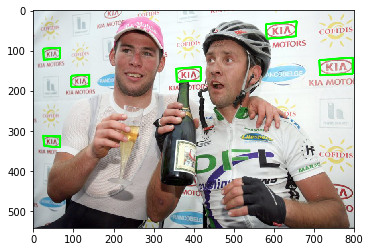

In [3]:
from matplotlib import pyplot as plt

# Read an example test image
kia_test_filename = "data/images/07596671.jpg"
kia_test_image = cv2.imread(kia_test_filename)

detected_logos = SIFTMatcher.detect_objects(kia_test_image)
annotated_image = model.annotate_image_with_objects(kia_test_image, detected_logos)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.show()

The model implementation appears to be working well, we can now move towards a more general validation.